# Support Vector Machine

Svm Machine Learning Model, 
Confusion matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.shape

(20000, 17)

Here manuel Splitting of data is done , we can also use train_test_split with test_size of 0.2

In [4]:
x = np.array(df)[: , 1:16]
y = np.array(df.letter)[:]

In [5]:
x

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [6]:
x_train = x[0:16000,0:17]
x_test = x[16001: , :]
y_train = y[:16000]
y_test = y[16001:]

# Building SVM Model

In [7]:
from sklearn import svm

In [8]:
model = svm.SVC(C=3)

C is the penalty of wrong classification

In [9]:
model.fit(x_train , y_train)

SVC(C=3)

In [10]:
y_pred = model.predict(x_test)
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [11]:
model.score(x_test , y_test)

0.927231807951988

In [12]:
y_grid = (np.column_stack([y_test , y_pred]))
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [13]:
import string 
lab = list(string.ascii_uppercase[0:26])
plab = ["Predicted "+ s for s in lab]

In [14]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

In [15]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

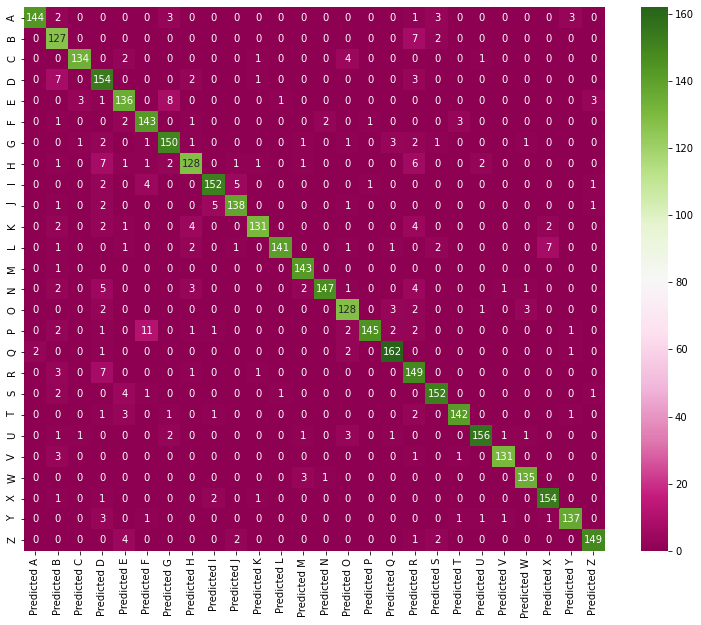

In [16]:
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test , y_pred , labels = lab)
df_cm = pd.DataFrame(cm, index = [i for i in lab] , 
                    columns = [i  for i in plab])

plt.figure(figsize = (13,10))
sns.heatmap(df_cm , annot = True , fmt = 'g' , cmap = 'PiYG')
plt.show()